In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import hvplot.pandas
from scipy.stats import linregress
import json

In [2]:
file_path = "../Resources/VAERSDATA1 (3).csv"
covid_df = pd.read_csv(file_path)
covid_df.sample(20)

,VAERS_ID,RECVDATE,STATE,AGE_YRS,SEX,DIED,DATEDIED,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,V_ADMINBY,VAX_MANU,HISTORY,ALLERGIES
375140,2019237,1/8/2022,AZ,46,F,NaN,NaN,N,12/23/2021,12/23/2021,0.0,PHM,PFIZER\BIONTECH,I have no chronic or long-standing health cond...,"No known allergies to medications, foods, or o..."
325221,2659698,1/28/2021,NaN,42,M,NaN,NaN,Y,1/25/2021,1/26/2021,1.0,OTH,MODERNA,NaN,NaN
197263,1492094,7/22/2021,MO,33,M,NaN,NaN,U,3/8/2021,3/8/2021,0.0,PVT,PFIZER\BIONTECH,Seasonal Allergies,Zofran
882261,1801481,10/20/2021,AL,91,M,NaN,NaN,Y,9/16/2021,9/17/2021,1.0,PVT,MODERNA,"Coronary artery disease, Atrial Fibrillation,...","Penicillin, Sulfa meds"
858728,989450,1/31/2021,IN,84,F,NaN,NaN,Y,1/23/2021,1/23/2021,0.0,OTH,MODERNA,Dry cough; undetermined cause. Two doctors ar...,"Penicillin, sulfa, codeine (reaction), e-mycin..."
547246,2173381,3/11/2022,TX,58,F,NaN,NaN,Y,9/1/2021,1/20/2022,141.0,PHM,MODERNA,Asthma,"Penicillin, Cephalosporins"
652864,1718419,9/21/2021,MI,65,F,NaN,NaN,N,2/25/2021,2/28/2021,3.0,PUB,PFIZER\BIONTECH,Comments: List of non-encoded Patient Relevant...,NaN
697356,1353273,5/27/2021,NJ,68,F,NaN,NaN,Y,2/11/2021,2/11/2021,0.0,UNK,PFIZER\BIONTECH,Medical History/Concurrent Conditions: Hyperte...,NaN
804140,1602542,8/21/2021,NJ,76,F,NaN,NaN,Y,2/4/2021,NaN,NaN,UNK,MODERNA,NaN,NaN
99522,1120525,3/21/2021,TN,24,M,NaN,NaN,Y,3/20/2021,3/20/2021,0.0,OTH,JANSSEN,NaN,No allergy to medications. Food nut allergy to...


In [3]:
covid_df.drop(['VAERS_ID', 'NUMDAYS', 'V_ADMINBY', 'HISTORY', 'ALLERGIES'], axis=1, inplace=True)

covid_df.head()


,RECVDATE,STATE,AGE_YRS,SEX,DIED,DATEDIED,RECOVD,VAX_DATE,ONSET_DATE,VAX_MANU
0,2/10/2021,IL,32,F,NaN,NaN,N,1/27/2021,2/4/2021,MODERNA
1,2/14/2021,NH,61,M,NaN,NaN,U,2/14/2021,2/14/2021,MODERNA
2,2/28/2021,WA,74,M,NaN,NaN,N,2/24/2021,2/24/2021,PFIZER\BIONTECH
3,3/2/2021,AZ,81,M,NaN,NaN,N,2/12/2021,2/26/2021,PFIZER\BIONTECH
4,4/16/2021,TX,15,M,NaN,NaN,Y,4/15/2021,4/15/2021,PFIZER\BIONTECH


In [4]:
# Adverse Reactions
adverse_reactions_df = covid_df[(covid_df['RECOVD'] != 'Y')]

# Seperate deaths
deaths_df = covid_df[(covid_df['DIED'] == 'Y')]

# Group by manufacturer for adverse reactions
adverse_reactions_by_manufacturer = adverse_reactions_df.groupby('VAX_MANU').size().reset_index(name='Adverse_Reactions')

# Group by manufacturer for deaths
deaths_by_manufacturer = deaths_df.groupby('VAX_MANU').size().reset_index(name='Deaths')

# Merge both summaries
summary_df = adverse_reactions_by_manufacturer.merge(deaths_by_manufacturer, on='VAX_MANU', how='outer').fillna(0)

# Print
summary_df



,VAX_MANU,Adverse_Reactions,Deaths
0,JANSSEN,35521,1317.0
1,MODERNA,268139,7563.0
2,NOVAVAX,218,0.0
3,PFIZER\BIONTECH,287050,7403.0
4,UNKNOWN MANUFACTURER,13543,623.0


<function matplotlib.pyplot.show(close=None, block=None)>

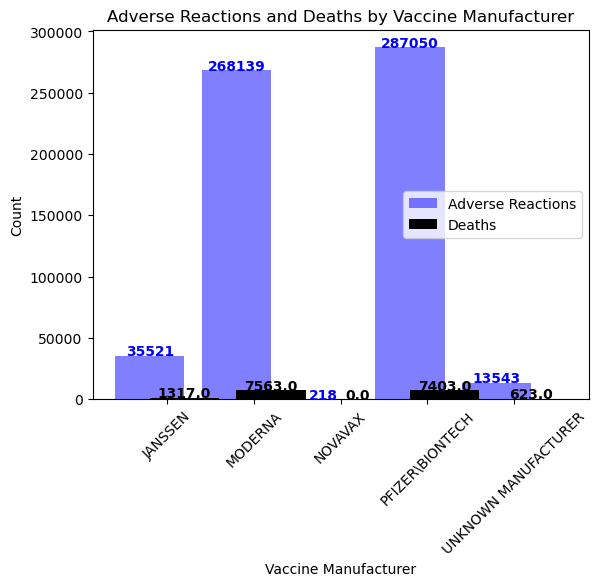

In [14]:
y1 = summary_df["Adverse_Reactions"]
y2 = summary_df["Deaths"]
x_labels = summary_df["VAX_MANU"]
x = np.arange(len(x_labels))

plt.bar(x -0.2, y1, color='blue', alpha=0.5, align='center', label="Adverse Reactions")
plt.bar(x +0.2, y2, color='black', alpha=1, label="Deaths")

# Add totals above bars
for i in range(len(x)):
    plt.text(x[i] - 0.2, y1.iloc[i] + 5, str(y1.iloc[i]), ha='center', fontsize=10, fontweight='bold', color='blue')
    plt.text(x[i] + 0.2, y2.iloc[i] + 5, str(y2.iloc[i]), ha='center', fontsize=10, fontweight='bold', color='black')

plt.xticks(ticks=x, labels=x_labels, rotation=45)
plt.xlabel("Vaccine Manufacturer")
plt.ylabel("Count")
plt.title("Adverse Reactions and Deaths by Vaccine Manufacturer")
plt.legend()
plt.show